# Algorytm k-means #
Autor: Jarosław Żygierewicz
Koretka: Rafał Masełek

Algorytm k-means jest zaimplementowany w module *scipy.cluster.vq* ([*vq: vector quantization*](https://docs.scipy.org/doc/scipy/reference/cluster.vq.html)). Mamy tam funkcję:

*kmeans(obs, k_or_guess, iter=20, thresh=1e-05)*

optymalizującą położenia centroidów, oraz pomocniczą funkcję *vq*, przypisującą poszczególne obserwacje do skupisk reprezentowanych przez centroidy.

Przed puszczeniem algorytmu k-means na danych dobrze jest przeskalować każdą z cech w macierzy wejściowej, tak aby miała jednostkową wariancję. Można to zrobić za pomoca funkcji *whiten*.

### Przykładowy kod.
Kod ten pokazuje jak:

*   wygenerować symulowane dane,
*   przeskalować je, tak aby miały jednostkową wariancję w każdej z cech,
*   podzielić je na dwa skupiska,
*   zilustrować wynik.

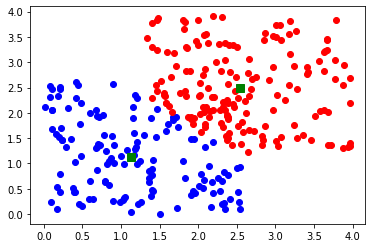

In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten
import matplotlib.pyplot as plt

# generujemy dane: 
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią (1,1)
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią  (0.5,0.5)
 
data = vstack((rand(150,2) + array([.5,.5]), rand(150,2)))
data =  whiten(data)
# policz K-Means dla  K = 2 (2 skupiska)
centroids,_ = kmeans(data,2)
# przypisz wektory wejściowe do skupisk
idx,_ = vq(data, centroids)
 
# narysuj wyniki
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

# Segmentacja obrazu algorytmem k-means

W tym ćwiczeniu zapoznamy się z zastosowaniem algorytmu analizy skupień do segmetacji obrazu. Segmentacja tego typu może stanowic etap wstępnego przetwarzania na potrzeby np. detekcji obiektów lub klasyfikacji. W zadaniu tym zapoznamy sie także z metodą dobierania atumatycznie ilości skupisk.


Obrazek na którym będziemy pracować znajduje się pod [tym](https://brain.fuw.edu.pl/edu/images/b/b8/Skan.png) adresem, proszę go zapisać w bieżącym katalogu, podłączyć dysk Google'a, zimportować i obejrzeć:

In [2]:
folder = './uczenie-maszynowe-2021-22-private/dane/' # podaj lokalizację obrazu

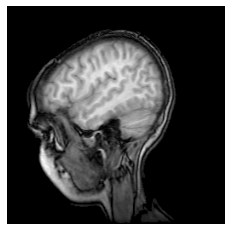

In [3]:
from pylab import plot,show,figure,imshow,cm, imread, axis
import numpy as np
from scipy.cluster.vq import kmeans,vq
 
image = imread(folder + 'image.png')
# Oryginalny obrazek miał przestrzeń barwną RGB.
# Spłaszczamy przestrzeń barwną obrazka
image = image.mean(axis=2)
#oglądamy obrazek
imshow(image, cmap=cm.gray)
axis('off')
show()

Teraz zamieniamy rysunek (dwuwymiarowa tablica 256x256) na wektor (o długości 256*256):

In [4]:
data = image[:]
print(data.shape)
data.shape = 256*256, 1
print(data.shape)

(256, 256)
(65536, 1)


Teraz będziemy próbować podzielić ten wektor na skupiska (w liczbie od 2 do 9). Dla każdej konkretnej liczby skupisk obliczamy dwie wielkości:

$J_{intra} (K)$ - to jest miara odległości wewnątrz centrów: równanie na $J$ znajduje się [tutaj](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_10#Algorytm_k-.C5.9Brednich:).

$J_{inter} (K) = min_{j<i} \sqrt{(\mu_i - \mu_j)^T (\mu_i - \mu_j)} $ - to najmniejsza odległość między centrami.

In [5]:
K_max = 9
J_inter = np.ones(K_max)*1e16
J_intra = np.zeros(K_max)
centroids =[]
# pętla w której zmieniamy iloś centrów skupienia
for K in range(2, K_max):
    # napisz pętlę, w której wywołasz algorytm zaimplementowany w scipy.cluster.vq.kmeans 
    # Ponieważ wg dokumentacji "centroids assigned to no observations are removed during iterations"
    # istnieje ryzyko, że w wyniku działania algorytmu dostaniesz mniej niż K skupisk 
    # Zatem pętla powinna się wykonywać tak długo, aż dostaniesz K skupisk, ale nie więcej niż powiedzmy 20 razy.
    # W każdej iteracji wpisz współrzędną skupiska do zmiennej "centroids" oraz J_intra na pozycji K-tej.
    
    #pętla tutaj
    ...
    
    print('K: ', K, len(centroids))
    # teraz będziemy liczyć odległości między centrami
    for ki in range(len(centroids)):
        for kj in range(ki):
            print(f'ki={ki} kj={kj}')
            print(centroids[ki])
            print(centroids[kj])
            ################
            ## dopisz kod obliczający odległość między centrami i oznacz ją d
            d = ...
            ################
            # jeśli uzyskana odległość jest mniejsza niż dotychczas zapamiętana w J_inter to ją zapamiętujemy, 
            # jeśli nie to zostawiamy poprzednią (tablica jest zainicjalizowana 1e16, sprawdz!)
            ...
            
    print(K, J_intra[K],J_inter[K])

K:  2 2
ki=1 kj=0
[0.54790753]
[0.0314784]
2 0.0748000219464302 0.5164291262626648
K:  3 3
ki=1 kj=0
[0.00869292]
[0.6574838]
ki=2 kj=0
[0.28297636]
[0.6574838]
ki=2 kj=1
[0.28297636]
[0.00869292]
3 0.0407857745885849 0.27428343892097473
K:  4 4
ki=1 kj=0
[0.18932892]
[0.00369261]
ki=2 kj=0
[0.3829961]
[0.00369261]
ki=2 kj=1
[0.3829961]
[0.18932892]
ki=3 kj=0
[0.6769116]
[0.00369261]
ki=3 kj=1
[0.6769116]
[0.18932892]
ki=3 kj=2
[0.6769116]
[0.3829961]
4 0.031474292278289795 0.18563631176948547
K:  5 5
ki=1 kj=0
[0.16923708]
[0.0019557]
ki=2 kj=0
[0.5602568]
[0.0019557]
ki=2 kj=1
[0.5602568]
[0.16923708]
ki=3 kj=0
[0.34121433]
[0.0019557]
ki=3 kj=1
[0.34121433]
[0.16923708]
ki=3 kj=2
[0.34121433]
[0.5602568]
ki=4 kj=0
[0.7538321]
[0.0019557]
ki=4 kj=1
[0.7538321]
[0.16923708]
ki=4 kj=2
[0.7538321]
[0.5602568]
ki=4 kj=3
[0.7538321]
[0.34121433]
5 0.02248954214155674 0.167281374335289
K:  6 6
ki=1 kj=0
[0.13425873]
[0.5988826]
ki=2 kj=0
[0.25877884]
[0.5988826]
ki=2 kj=1
[0.25877884]
[0.1

#### Ile współrzędnych mają skupiska i dlaczego tyle, skoro zaczęliśmy od 2D obrazka?

Wykreślamy stosunek $J_{intra}/J_{inter}$ i znajdujemy $K$, dla którego jest najmniejszy:

Optymalne K=5


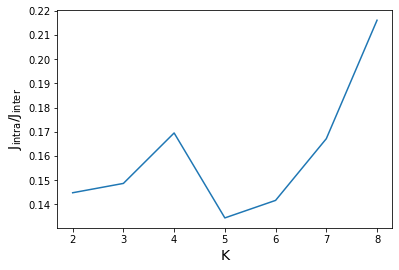

In [6]:
plt.figure(1)
plt.xlabel('K', fontsize=14)
plt.ylabel(r'$\mathrm{J_{intra}/J_{inter}}$', fontsize=14)
# narysuj wykres J_{intra}/J_{inter} w funkcji K
...
# znajdz optymalne K, tj. minimum
K_opt = ...
# wypisujemy
print(f'Optymalne K={K_opt}')

Dla tej optymalnej ilości skupisk znajdujemy położenia centrów i przypisujemy klasę dla każdego punktu danych:

In [7]:
# znajdz skupiska dla optymalnego K
centroids, J_intra[K] = ...

# przypisujemy klasę
idx,_ = vq(data, centroids)

Formatujemy wektor w obrazek i podziwiamy efekt:

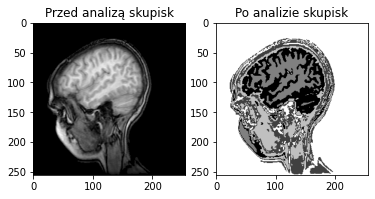

In [8]:
idx.shape = 256,256
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image, cmap=cm.gray)
axarr[0].set_title('Przed analizą skupisk')
axarr[1].imshow(idx, cmap=cm.gray)
axarr[1].set_title('Po analizie skupisk')
show()

Dla porównania proszę wykreślić histogram odcieni szarości dla wektora *data* i wektora *idx*. Proszę wyświetlić wartości przeskalowane tak, żeby maksymalna wartość w wektorze odpowiadała 255 a najmniejsza 0.

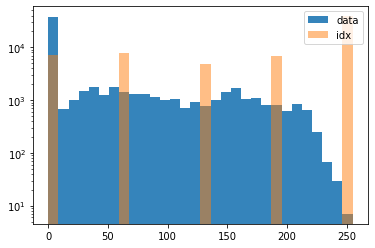

In [9]:
# rysujemy histogramy
...

plt.yscale('log')
plt.legend()
         

# Algorytm EM (Expectation Maximization)

Program, który powstanie po uzupełnieniu kodu powinien ilustrować dopasowywanie modelu EM do danych będzących sumą dwóch rozkładów gaussowskich.

Najpierw standardowe importy i kilka funkcji pomocniczych:

In [10]:
import matplotlib
import pylab as py
import random, copy
import numpy as np
import sys
 
# W tej komórce nie ma nic do uzupełniania, ale w dalszej części programu trzeba korzystać z poniższych funkcji,
# dlatego proszę się z nimi zapoznać.

def pnorm(x, m, s):
    """
    Oblicza gęstość wielowymiarowego rozkładu normalnego dla punktów
    w wektorze x
    Parametry rozkładu:
    m - średnia
    s- macierz kowariancji
    dla zwiększenia czytelności kodu stosujemy typ matrix
    """
    xm = np.matrix(x-m)
    xmt = np.matrix(x-m).transpose()
    for i in range(len(s)):
        if s[i,i] <= sys.float_info[3]: # min float
            s[i,i] = sys.float_info[3]
    sinv = np.linalg.inv(s)
 
    return (2.0*np.pi)**(-len(x)/2.0)*(1.0/np.sqrt(np.linalg.det(s)))\
            *np.exp(-0.5*(xm*sinv*xmt))
 
def draw_params(t,nbclusters):
        '''funkcja do losowania parametrów początkowych
        t - zbiór treningowy
        '''
        nbobs, nbfeatures = t.shape
        # inicjuje średnie przez losowanie punktu ze zbioru danych
        tmpmu = np.array([t[np.random.randint(0,nbobs),:]],np.float64)
        # kowariancje inicjowane są jako macierze diagonalne , wariancja dla każdej cechy inicjowana jest jako wariancja tej cechy dla całego zbioru 
        sigma = np.zeros((nbfeatures,nbfeatures))
        for f in range(nbfeatures):
            sigma[f,f] = np.var(t[:,f])
        #phi inicjujemy tak, że każda składowa mieszanki ma takie samee prawdopodobieństwo
        phi = 1.0/nbclusters
        print ('INIT:', tmpmu, sigma, phi)
        return {'mu': tmpmu,\
                'sigma': sigma,\
                'phi': phi}
 
def plot_gauss(mu,sigma):
    ''' Funkcja rysująca kontury funkcji gęstości prawdopodobieństwa 
       dwuwymiarowego rozkładu Gaussa'''
 
    x = np.arange(-6.0, 6.0001, 0.1)
    y = np.arange(-6.0, 6.0001, 0.1)
    X,Y = np.meshgrid(x, y)
    X.shape = 1,len(x)*len(y)
    Y.shape = 1,len(x)*len(y)
    P = np.vstack((X,Y))
    invS = np.linalg.inv(sigma)
    R = P.T-mu
    z = np.zeros(len(R))
    for i in range(len(R)):
        z[i] = np.exp(-0.5*np.dot( R[i,:].T,np.dot(invS,R[i,:])))
 
    z.shape = len(x),len(y)
    py.contourf(x,y,z,alpha = 0.5)
    py.plot(mu[0],mu[1],'o')

## Szkielet algorytmu ##
Poniższy kod to szkielet właściwej funkcji wykonującej optymalizację. Trzeba go uzupełnić implementując równania z wykładu. Proszę uważnie czytać komentarze.

In [11]:
def expectation_maximization(t, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True):
    """
    Parametry
    ----------
    t -- zbiór treningowy, 
    Każdy wiersz t jest przykładem (obserwacją), każda kolumna to cecha 
    nbclusters -- ilość klastrów, z których budujemy model mieszany
    nbiter -- ilość iteracji
    normalize -- True/False, opcjonalna normalizacja
    epsilon -- kryterium zbieżności
    
    Powtórz kroki E i M aż do spełnienia warunku |E_t - E_{t-1}| < ε
    ----------------
    Wartość zwracana
    ----------------
    Funkcja zwraca parametry modelu (centra i macerze kowariancji Gaussów i ich wagi \phi) oraz 
    etykiety punktów zbioru treningowego oznaczające do którego z Gaussów w modelowanej mieszance należą.
    """
 
    nbobs, nbfeatures = t.shape
 
    ### Opcjonalna normalizacja przez podzielenie każdej cechy przez jej odchylenie standardowe
    ...
 
 
    result = {}
    random.seed()
 
    # szykujemy tablice na prawdopodobieństwa warunkowe
    Pz = np.zeros((nbobs, nbclusters)) # P(z|x): opisywane równaniami (2) i (3) z wykładu 
    Px = np.zeros((nbobs, nbclusters)) # P(x|z): opisywane równaniem (4)  
 
    # inicjujemy parametry dla każdego składnika mieszanki
    # params będzie listą taką, że params[i] to słownik
    # zawierający parametry i-tego składnika mieszanki
    params = []
    for i in range(nbclusters):
        params.append( draw_params(t, nbclusters) )
 
    old_log_estimate = sys.maxsize              # init
    log_estimate = sys.maxsize/2 + epsilon      # init
    estimation_round = 0    
 
    # powtarzaj aż zbiegniesz 
    while( abs(log_estimate - old_log_estimate) > epsilon and (not monotony or log_estimate < old_log_estimate) ):
        restart = False
        old_log_estimate = log_estimate   
        ########################################################
        # krok E: oblicz Pz dla każdego przykładu (czyli w oznaczeniach z wykładu w_i^j)
        ########################################################
        # obliczamy prawdopodobieństwa  Px[j,i] = P(x_j|z_j=i)  
        for j in range(nbobs): # iterujemy po przykładach
            for i in range(nbclusters): # iterujemy po składnikach
                Px[j,i] = ... #  (równanie 4)
 
        #  obliczamy prawdopodobieństwa Pz[j,i] = P(z_j=i|x_j)   
        #  najpierw licznik równania (3)   
        for j in range(nbobs): 
            for i in range(nbclusters):
                Pz[j,i] = ...

        #  mianownik równania (3)
        for j in range(nbobs): 
            tmpSum = 0.0
            for i in range(nbclusters):
                ...

        # składamy w całość Pz[j,i] = P(z_j=i|x_j)
            ...
 
        ###########################################################
        # krok M: uaktualnij paramertry (sets {mu, sigma, phi}) #
        ###########################################################
        #print "iter:", iteration, " estimation#:", estimation_round,\
        #            " params:", params
        for i in range(nbclusters):
            print("------------------")
            # parametr phi: równanie (6)
            Sum_w = np.sum(Pz[:,i])
            
            params[i]['phi'] = ...
            if params[i]['phi'] <= 1.0/nbobs:           # restartujemy jeśli zanika nam któraś składowa mieszanki
                restart = True                          
                print("Restarting, p:",params[i]['phi'])
                break

            print('i: ',i,' phi: ', params[i]['phi'])

            # średnia: równanie (7)
            params[i]['mu'] = ...
            print('i: ',i,' mu: ', params[i]['mu'])
 
            # macierz kowariancji: równanie (8)
            s = np.matrix(np.zeros((nbfeatures,nbfeatures))) #init
            for j in range(nbobs):
                roznica = ...
                s += ...
            params[i]['sigma'] = s/Sum_w
 
            print(params[i]['sigma'])
 
            ### Testujemy czy składniki się nie sklejają i w razie potrzeby restartujemy
            if not restart:
                restart = True
                for i in range(1,nbclusters):
                    if not np.allclose(params[i]['mu'], params[i-1]['mu'])\
                    or not np.allclose(params[i]['sigma'], params[i-1]['sigma']):
                        restart = False
                        break

            if restart:                
                old_log_estimate = sys.maxsize            # init
                log_estimate = sys.maxsize/2 + epsilon    # init
                params = [draw_params(t,nbclusters) for i in range(nbclusters)] # losujemy nowe parametry startowe
                print('RESTART')
                continue
 
 
            ####################################
            # liczymy estymatę log wiarygodności: równaie (1)  #
            ####################################
            log_estimate = ...
            print("(EM) poprzednia i aktualna estymata log wiarygodności: ",\
                    old_log_estimate, log_estimate)
            estimation_round += 1
        ##########################
        #  rysujemy aktualny stan modelu
        ##########################
        py.ioff()
        py.clf()
        py.ion()
        for i in range(nbclusters):
            plot_gauss(np.array(params[i]['mu']),np.array(params[i]['sigma']))
        py.plot(x[:,0],x[:,1],'g.')
        py.axis('equal')
        py.draw()
 
 
        # Pakujemy wyniki
        result['quality'] = -log_estimate
        result['params'] = copy.deepcopy(params)
        result['clusters'] = [[o for o in range(nbobs)\
                if Px[o,c] == max(Px[o,:])]\
                for c in range(nbclusters)]
    return result

## Finalny program ##
Przykładowy program korzystający z powyższych funkcji:

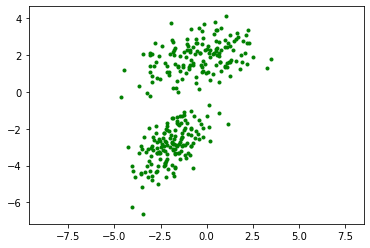

In [12]:
# robimy mieszankę dwóch gaussów:
#parametry rozkładu
# wektor średnich:
mu1 = [-2,-3] 
# macierz kowariancji:
Sigma1 = np.array([[1, 0.5],
                  [0.5, 1]])
# generujemy dane (150 punktow): 
x1 = ... #
mu2 = [-0.5,2] 
# macierz kowariancji:
Sigma2 = np.array([[3, 0.5],
                  [0.5, 1]])
# generujemy dane (150 punktow):  
x2 = ... #
# łączymy x1 i x2 aby otrzymac jeden zbiór
x = np.vstack((x1,x2))
py.plot(x[:,0],x[:,1],'g.')
py.axis('equal')
py.show()

INIT: [[-0.08366583  1.5149127 ]] [[2.40434176 0.        ]
 [0.         6.72165348]] 0.5
INIT: [[-0.90000494 -3.44052616]] [[2.40434176 0.        ]
 [0.         6.72165348]] 0.5
------------------
i:  0  phi:  0.505582203269322
i:  0  mu:  [-0.41222054  1.30450791]
[[2.35297442 1.05400083]
 [1.05400083 3.16951653]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1297.6127426836267
------------------
i:  1  phi:  0.494417796730678
i:  1  mu:  [-1.97649846 -2.44282763]
[[1.21972687 0.85577735]
 [0.85577735 3.2543509 ]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1299.2716292639075
------------------
i:  0  phi:  0.50328229164376
i:  0  mu:  [-0.39437209  1.58008192]
[[2.55266244 0.72807614]
 [0.72807614 2.0726863 ]]
(EM) poprzednia i aktualna estymata log wiarygodności:  -1299.2716292639075 -1162.3446134575322
------------------
i:  1  phi:  0.4967177083562401
i:  1  mu:  [-1.98733985 -2.70469263]
[[0.97695879 0.70170699]


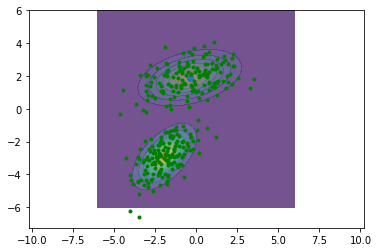

In [13]:
res = expectation_maximization(x, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True)

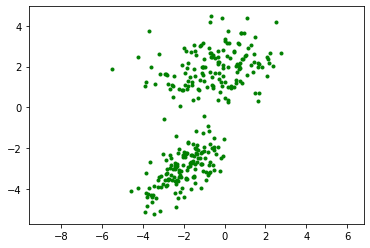

In [14]:
# robimy mieszankę dwóch gaussów:

#parametry rozkładu
# wektor średnich:
mu1 = [-2,-3] 
# macierz kowariancji:
Sigma1 = np.array([[1, 0.5],
                  [0.5, 1]])
# generujemy dane (150 punktow): 
x1 = ... #
mu2 = [-0.5,2] 
# macierz kowariancji:
Sigma2 = np.array([[3, 0.5],
                  [0.5, 1]])
# generujemy dane (150 punktow): 
x2 = ... #
# łączymy x1 i x2 aby otrzymac jeden zbiór
x = np.vstack((x1,x2))
py.plot(x[:,0],x[:,1],'g.')
py.axis('equal')
py.show()

INIT: [[1.30518081 2.08896306]] [[2.27763546 0.        ]
 [0.         6.95680498]] 0.5
INIT: [[-1.22318962 -2.49096134]] [[2.27763546 0.        ]
 [0.         6.95680498]] 0.5
------------------
i:  0  phi:  0.3373448431762009
i:  0  mu:  [0.14274664 1.95762804]
[[1.4491645  0.41182268]
 [0.41182268 1.87791009]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1358.6843726408902
------------------
i:  1  phi:  0.662655156823799
i:  1  mu:  [-1.94506708 -1.71813639]
[[1.22891915 0.72015043]
 [0.72015043 4.98442298]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1298.8284975063457
------------------
i:  0  phi:  0.34891178260772826
i:  0  mu:  [0.13048129 2.10189035]
[[1.49806437 0.20876392]
 [0.20876392 1.01721486]]
(EM) poprzednia i aktualna estymata log wiarygodności:  -1298.8284975063457 -1164.4112875178407
------------------
i:  1  phi:  0.6510882173922717
i:  1  mu:  [-1.97558536 -1.86074712]
[[1.14779591 0.55745694]
 [

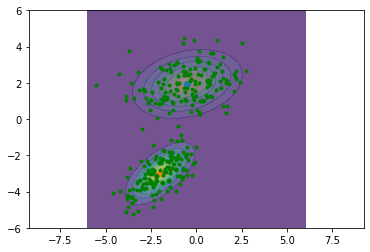

Dopasowany model: 
[{'mu': array([-0.50048435,  1.94166534]), 'sigma': matrix([[2.41857486, 0.39127342],
        [0.39127342, 0.95237737]]), 'phi': 0.5098873120729243}, {'mu': array([-2.01089116, -2.99556974]), 'sigma': matrix([[0.96778899, 0.54802465],
        [0.54802465, 0.7743327 ]]), 'phi': 0.4901126879270758}]


In [15]:
py.figure()
res = expectation_maximization(x, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True)
py.ioff()
py.show()
# wypisz parametry
print('Dopasowany model: ')
print(res['params'])

Aby obliczyć gęstość prawdopodobieństwa rozkładu mieszanego dla pewnego nowego punktu "x" możemy zastosować poniższą funkcję:

In [16]:
def prob_mix(params, x):
    '''params - parametry dopasowanego gaussowskiego modelu mieszanego
    x - punkt wejścowy,
 
    funkcja zwraca gestość prawdopodobieństwa, dla x w rozkładzie mieszanym
    '''
    prob = 0
    for i in range(len(params)):
        prob+= pnorm(x, params[i]['mu'], params[i]['sigma']) * params[i]['phi']
 
 
    return prob
#---------------- przykładowe użycie: ----------------
x=(6,-4)
print('P(x=(',str(x),')):', prob_mix(res['params'], x))

P(x=( (6, -4) )): [[1.01001515e-17]]


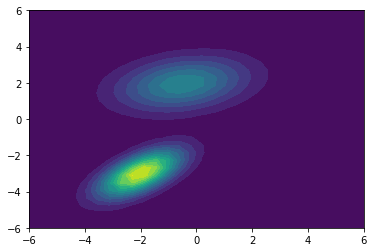

In [18]:
# narysuj gęstość pradopodobieństwa korzystając z prob_mix() na siatce [-6,6] x [-6,6]
...